In [1]:
import time
import sys
import math
import numpy as np
import gym
from gym_duckietown.simulator import Simulator as DuckietownEnv
from IPython.display import clear_output
from matplotlib import pyplot as plt
import collections
%matplotlib inline

def live_plot(data_dict, figsize=(7,5), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    for label,data in data_dict.items():
        plt.plot(data, label=label)
    plt.title(title)
    plt.grid(True)
    plt.xlabel('timestep')
    plt.legend(loc='center left') # the plot evolves to the right
    plt.show();

### Initialize Enviroment

In [3]:
env = DuckietownEnv(
    map_name ='PID_demo', 
    domain_rand = False,
#     robot_speed = 5,
    actions_as_voltages=True,
    init_angle=0
)

obs = env.reset()
env.render(top_down=True)

### Determine Task

In [4]:
# mode = "position"
mode = "velocity"

if mode == "position":
    goal = 3.25

    def read_sensor():
        return env.cur_pos[0]

    kp = 1.0
    kd = 1.0
    ki = 0.
elif mode == "velocity":
    goal = 1

    def read_sensor():
        return env.speed

    kp = 1.0
    kd = 0.
    ki = 0.3

### Run Control Loop

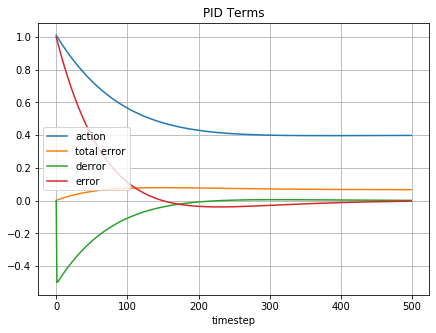

In [5]:
obs = env.reset()

last_error = goal - read_sensor()
total_error = 0
logs = collections.defaultdict(list)
states = collections.defaultdict(list)

for t in range(350):
    sensor = read_sensor()
    error = goal - sensor
    derror = (error - last_error)/env.delta_time
    total_error += error * env.delta_time
    
    action = kp * error + kd * derror + ki * total_error

    last_error = error

    obs, reward, done, info = env.step([action, action])
    env.render(top_down=True)

    logs['action'].append(action)
    logs['total error'].append(total_error/20)
    logs['derror'].append(derror)
    logs['error'].append(error)
    live_plot(logs, title='PID Terms')
env.render(close=True)